In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

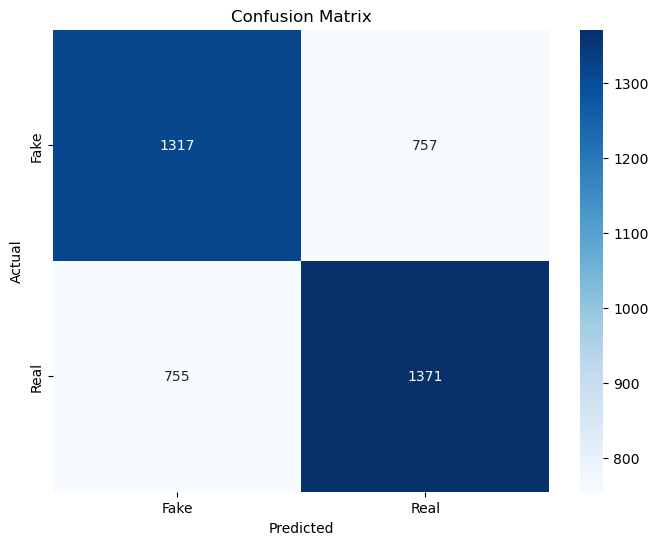


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      2074
           1       0.64      0.64      0.64      2126

    accuracy                           0.64      4200
   macro avg       0.64      0.64      0.64      4200
weighted avg       0.64      0.64      0.64      4200



In [ ]:
# Set working directory
os.chdir('C:/Users/asus/Documents/GitHub/CMSC-197-Miniproject')

# Read JSON file
df = pd.read_csv('data/finalized_data.csv')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# Training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)

# Create and test SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, predictions))

cv_scores = cross_val_score(svm, X, y, cv=10)

print(f"10-fold Cross Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")